In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from numpy import sqrt
import scipy

In [3]:
def New_OseenTensor(ri,rj):
    R =1
    rel=ri-rj
    normR = norm(rel)

    B=np.array([rel[0]*rel,
      rel[1]*rel])
    
    C=np.array([[1 ,0],
    [0 ,1]])
    
    return (((1/normR)**2)*B+C)*3/4*R/normR

In [4]:
a = 500;

In [6]:
def New_MainMoving(r1i,r2i,r3i,r4i,l1,l2,l3,stepnum):
    II = np.eye(2)







    r1=r1i.copy()
    r2=r2i.copy()
    r3=r3i.copy()
    r4 =r4i.copy()


    for i in range(stepnum):

    


        MM=np.array([[II, New_OseenTensor(r1,r2), New_OseenTensor(r1,r3), New_OseenTensor(r1,r4)],
        [New_OseenTensor(r2,r1), II, New_OseenTensor(r2,r3), New_OseenTensor(r2,r4)],
        [New_OseenTensor(r3,r1), New_OseenTensor(r3,r2), II, New_OseenTensor(r3,r4)],
        [New_OseenTensor(r4,r1), New_OseenTensor(r4,r2), New_OseenTensor(r4,r3), II]])
        
        
        
        newO = np.zeros((8,8))
        for i in range(4):
            for j in range(4):
                newO[2*i:2*i+2,2*j:2*j+2] = MM[i,j]
        





        RR=np.array([[1,0, 1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1],
       [-r1[1], r1[0], -r2[1], r2[0], -r3[1], r3[0], -r4[1], r4[0]]])

        
        NN=np.matmul(RR,np.linalg.inv(newO))
        
        

        
        



        OO=np.array([[r1[0]-r4[0], r1[1]-r4[1], 0, 0, 0, 0, r4[0]-r1[0], r4[1]-r1[1]],
        [0, 0, r2[0]-r4[0], r2[1]-r4[1], 0, 0, r4[0]-r2[0], r4[1]-r2[1]],
        [0, 0, 0, 0, r3[0]-r4[0], r3[1]-r4[1], r4[0]-r3[0], r4[1]-r3[1]],
        [(r4[1]-r1[1])/(l1[i]**2), (r1[0]-r4[0])/(l1[i]**2), 0, 0, (r3[1]-r4[1])/(l3[i]**2), (r4[0]-r3[0])/(l3[i]**2), ((r4[1]-r3[1])/(l3[i]**2))+(r1[1]-r4[1])/(l1[i]**2), ((r3[0]-r4[0])/(l3[i]**2))+(r4[0]-r1[0])/(l1[i]**2)],
        [(r4[1]-r1[1])/(l1[i]**2), (r1[0]-r4[0])/(l1[i]**2), (r2[1]-r4[1])/(l2[i]**2), (r4[0]-r2[0])/(l2[i]**2), 0, 0, ((r4[1]-r2[1])/(l2[i]**2))+(r1[1]-r4[1])/(l1[i]**2), ((r2[0]-r4[0])/(l2[i]**2))+(r4[0]-r1[0])/(l1[i]**2)]])


        

 
        AA = np.concatenate((OO,NN),axis=0)  




        BB=np.array([l1[i]*(l1[i+1]-l1[i]),
        l2[i]*(l2[i+1]-l2[i]),
        l3[i]*(l3[i+1]-l3[i]),
        0,
        0,
        0,
        0,
        0])



        DIF=np.linalg.solve(AA,BB)
        
        #print(np.sum(np.abs(np.matmul(AA,np.linalg.inv(AA))-np.eye(8))))
        
        
        #print(DIF)


        r1 += DIF[0:2]
        r2 += DIF[2:4]
        r3 += DIF[4:6]
        r4 += DIF[6:]
        



    r1f=r1
    r2f=r2
    r3f=r3
    r4f=r4
    DTETA=np.arctan((r4[1]-r1[1])/(r4[0]-r1[0]))
    return r1f,r2f,r3f,r4f,(*list((r1f+r2f+r3f+r4f-r1i-r2i-r3i-r4i)/4), DTETA)

In [227]:
T=1
R=1
D=10
E=3
W=E/T
stepnum=10000

time=np.linspace(0,T,stepnum)
opening=D-E+W*time  #il
closing=D-W*time  #dl
closed=(D-E)*np.ones(stepnum) #cls
opened=D*np.ones(stepnum)  #cll


r1i = np.array([0 ,0],dtype=np.float64);
r2i = np.array([D+D*(1/2) ,-D*(sqrt(3)/2)],dtype=np.float64)
r3i = np.array([D+D*(1/2), D*(sqrt(3)/2)],dtype=np.float64)
r4i = np.array([D ,0],dtype=np.float64)


DT=np.zeros(24)
DN=np.zeros(24)
DTeta=np.zeros(24)
DRCM=np.zeros((24,3))

r1i,r2i,r3i,r4i,dataaaa =New_MainMoving(r1i,r2i,r3i,r4i,opening,closed,closed)
r1i,r2i,r3i,r4i,dataaaa =New_MainMoving(r1i,r2i,r3i,r4i,opened,opening,closed)
r1i,r2i,r3i,r4i,dataaaa =New_MainMoving(r1i,r2i,r3i,r4i,opened,opened,opening)
r1i,r2i,r3i,r4i,dataaaa =New_MainMoving(r1i,r2i,r3i,r4i,closing,opened,opened)
r1i,r2i,r3i,r4i,dataaaa =New_MainMoving(r1i,r2i,r3i,r4i,closed,closing,opened)
r1i,r2i,r3i,r4i,dataaaa =New_MainMoving(r1i,r2i,r3i,r4i,closed,closed,closing)

print(dataaaa)


KeyboardInterrupt: 

In [246]:
np.linalg.norm(r3i-r4i)

10.0

In [8]:

data = np.zeros((3,30))

In [37]:
data1 = np.zeros((3,30))

R = 1
epsilons = R*np.linspace(0.01,3,30)
for i in range(30):
    E = epsilons[i]
    T=1
    D=10.*R
    W=E/T
    stepnum=10000



    r1i = np.array([0 ,0],dtype=np.float64);
    r2i = np.array([D+D*(1/2) ,-D*(sqrt(3)/2)],dtype=np.float64)
    r3i = np.array([D+D*(1/2), D*(sqrt(3)/2)],dtype=np.float64)
    r4i = np.array([D ,0],dtype=np.float64)
    
    
    time=np.linspace(0,T,stepnum)
    opening=D-E+W*time  #il
    closing=D-W*time  #dl
    closed=(D-E)*np.ones(stepnum) #cls
    opened=D*np.ones(stepnum)  #cll



    DT=np.zeros(24)
    DN=np.zeros(24)
    DTeta=np.zeros(24)
    DRCM=np.zeros((24,3))
    
    
    r1i,r2i,r3i,r4i,dataaaa =New_MainMoving(r1i,r2i,r3i,r4i,closing,opened,opened,stepnum)


    data[:,i] = dataaaa
    
    print(i)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


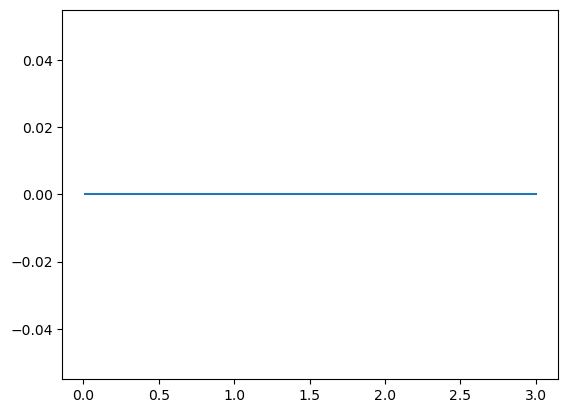

In [43]:
plt.plot(epsilons/R,np.abs(data[1]/R))

In [41]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons),np.log(np.abs(data[0])))
print(slope,r_value)

1.1451315491198553 0.9956227464273071


In [42]:
m1 = np.array([[1,2],[3,4]])

In [36]:
np.linalg.norm(m1)

5.477225575051661

In [44]:
data2 = np.zeros((3,30))
for i in range(30):
    E = epsilons[i]
    T=1
    R=1
    D=10
    W=E/T
    stepnum=10000



    r1i = np.array([0 ,0],dtype=np.float64)
    r2i = np.array([D+D*(1/2) ,-D*(sqrt(3)/2)],dtype=np.float64)
    r3i = np.array([D+D*(1/2), D*(sqrt(3)/2)],dtype=np.float64)
    r4i = np.array([D ,0],dtype=np.float64)
    
    
    
    time=np.linspace(0,T,stepnum)
    opening=D-E+W*time  #il
    closing=D-W*time  #dl
    closed=(D-E)*np.ones(stepnum) #cls
    opened=D*np.ones(stepnum)  #cll



    DT=np.zeros(24)
    DN=np.zeros(24)
    DTeta=np.zeros(24)
    DRCM=np.zeros((24,3))
    
    r1i,r2i,r3i,r4i,_ =New_MainMoving(r1i,r2i,r3i,r4i,closing,opened,opened,stepnum)
    r1i,r2i,r3i,r4i,_ =New_MainMoving(r1i,r2i,r3i,r4i,closed,closing,opened,stepnum)
    r1i,r2i,r3i,r4i,_ =New_MainMoving(r1i,r2i,r3i,r4i,closed,closed,closing,stepnum)    
    r1i,r2i,r3i,r4i,_ =New_MainMoving(r1i,r2i,r3i,r4i,opening,closed,closed,stepnum)
    r1i,r2i,r3i,r4i,_ =New_MainMoving(r1i,r2i,r3i,r4i,opened,opening,closed,stepnum)
    r1i,r2i,r3i,r4i,dataaaa =New_MainMoving(r1i,r2i,r3i,r4i,opened,opened,opening,stepnum)


    data[:,i] = dataaaa
    
    print(i)
    
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [177]:
r4i

array([10.02283212,  0.01158862])

In [178]:
r1i

array([ 1.77606663, -0.08269195])

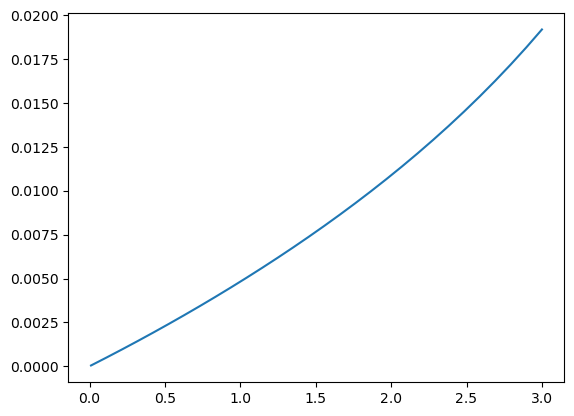

In [47]:
plt.plot(epsilons/R,data[0]/R)

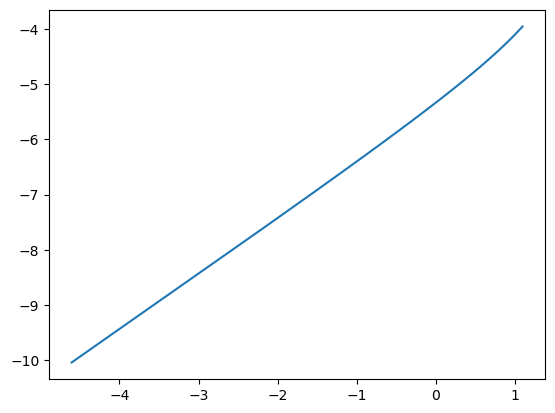

In [50]:
plt.plot(np.log(epsilons),np.log(np.abs(data[0])))

In [55]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons),np.log(np.abs(data[1])))
print(slope)

1.084936972578366


In [ ]:
DRCM(2,:)=New_MainMoving(cll,dl,cll);
DRCM(3,:)=New_MainMoving(cll,cll,dl);
DRCM(4,:)=New_MainMoving(il,cls,cls);
DRCM(5,:)=New_MainMoving(cls,il,cls);
DRCM(6,:)=New_MainMoving(cls,cls,il);
DRCM(7,:)=New_MainMoving(il,cll,cll);
DRCM(8,:)=New_MainMoving(cll,il,cll);
DRCM(9,:)=New_MainMoving(cll,cll,il);
DRCM(10,:)=New_MainMoving(cls,dl,cll);
DRCM(11,:)=New_MainMoving(cll,cls,dl);
DRCM(12,:)=New_MainMoving(dl,cll,cls);
DRCM(13,:)=New_MainMoving(cls,cll,dl);
DRCM(14,:)=New_MainMoving(dl,cls,cll);
DRCM(15,:)=New_MainMoving(cll,dl,cls);
DRCM(16,:)=New_MainMoving(dl,cls,cls);
DRCM(17,:)=New_MainMoving(cls,dl,cls);
DRCM(18,:)=New_MainMoving(cls,cls,dl);
DRCM(19,:)=New_MainMoving(cll,il,cls);
DRCM(20,:)=New_MainMoving(cls,cll,il);
DRCM(21,:)=New_MainMoving(il,cls,cll);
DRCM(22,:)=New_MainMoving(cll,cls,il);
DRCM(23,:)=New_MainMoving(il,cll,cls);
DRCM(24,:)=New_MainMoving(cls,il,cll);

DT(1,:)=DRCM(:,1);
DN(1,:)=DRCM(:,2);
DTeta(1,:)=DRCM(:,3);

save('resultmovestarDT.mat','DT')
save('resultmovestarDN.mat','DN')
save('resultmovestarDTeta.mat','DTeta')



clear
clc